<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/LSTM%26GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LSTM 신경망 훈련하기**

IMDB 리뷰 데이터를 로드하고, 훈련 세트와 검증 세트 분리

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) #자주 사용되는 단어 500개
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


각 샘플의 길이를 100에 맞추고, 길이가 짧으면 패딩을 추가

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
#LSTM 셀을 사용한 순환층 생성
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) #단어 임베딩
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SimpleRNN 클래스의 모델 파라미터 개수는 200개였다. LSTM 셀에는 작은 셀이 4개 있어 정확히 4배가 늘어 모델 파라미터 개수는 800개이다.

In [5]:
#모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 53ms/step - loss: 0.6929 - accuracy: 0.5253 - val_loss: 0.6925 - val_accuracy: 0.5562
Epoch 2/100
  3/313 [..............................] - ETA: 10s - loss: 0.6928 - accuracy: 0.5104

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 26s 84ms/step - loss: 0.6917 - accuracy: 0.5830 - val_loss: 0.6910 - val_accuracy: 0.6006
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6894 - accuracy: 0.6165 - val_loss: 0.6877 - val_accuracy: 0.6270
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6835 - accuracy: 0.6472 - val_loss: 0.6782 - val_accuracy: 0.6552
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6619 - accuracy: 0.6740 - val_loss: 0.6316 - val_accuracy: 0.6876
Epoch 6/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5978 - accuracy: 0.7196 - val_loss: 0.5768 - val_accuracy: 0.7258
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5647 - accuracy: 0.7375 - val_loss: 0.5576 - val_accuracy: 0.7408
Epoch 8/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5439 - accuracy: 0.7495 - val_loss: 0.5389 - val_accuracy: 0.74

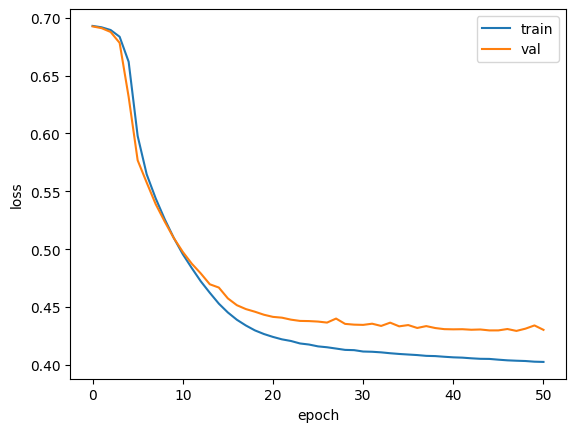

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**순환층에 드롭아웃 적용하기**

In [7]:
#LSTM 셀을 사용한 순환층 생성 2
#dropout 적용
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100)) #단어 임베딩
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
#모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 52ms/step - loss: 0.6927 - accuracy: 0.5224 - val_loss: 0.6919 - val_accuracy: 0.5588
Epoch 2/100
  3/313 [..............................] - ETA: 11s - loss: 0.6916 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 15s 48ms/step - loss: 0.6914 - accuracy: 0.5638 - val_loss: 0.6904 - val_accuracy: 0.5962
Epoch 3/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6891 - accuracy: 0.6015 - val_loss: 0.6875 - val_accuracy: 0.6264
Epoch 4/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6836 - accuracy: 0.6406 - val_loss: 0.6781 - val_accuracy: 0.6618
Epoch 5/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6598 - accuracy: 0.6850 - val_loss: 0.6302 - val_accuracy: 0.7094
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6131 - accuracy: 0.7028 - val_loss: 0.6031 - val_accuracy: 0.7114
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5925 - accuracy: 0.7184 - val_loss: 0.5832 - val_accuracy: 0.7394
Epoch 8/100
313/313 [==============================] - 18s 58ms/step - loss: 0.5763 - accuracy: 0.7349 - val_loss: 0.5650 - val_accuracy: 0.74

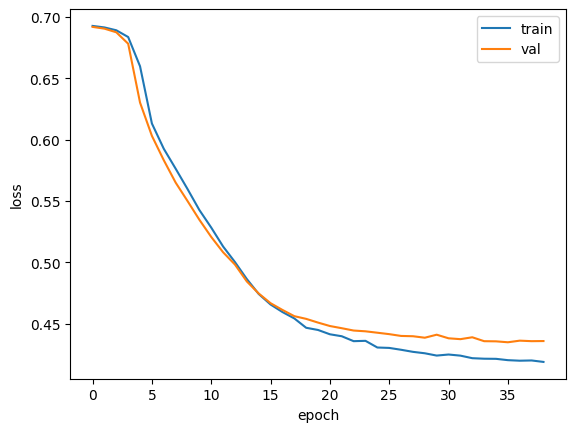

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같다! <br>
훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인할 수 있다.

**2개의 순환층 쌓기**

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100)) #단어 임베딩
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에, 출력 크기가 (None, 100, 8)로 표시되었다. 이에 반해 두 번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None, 8)이다.

In [12]:
#모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 36s 104ms/step - loss: 0.6929 - accuracy: 0.5121 - val_loss: 0.6928 - val_accuracy: 0.5096
Epoch 2/100
  2/313 [..............................] - ETA: 22s - loss: 0.6926 - accuracy: 0.5469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 33s 105ms/step - loss: 0.6916 - accuracy: 0.5564 - val_loss: 0.6908 - val_accuracy: 0.5526
Epoch 3/100
313/313 [==============================] - 28s 88ms/step - loss: 0.6869 - accuracy: 0.6029 - val_loss: 0.6815 - val_accuracy: 0.6402
Epoch 4/100
313/313 [==============================] - 30s 97ms/step - loss: 0.6634 - accuracy: 0.6563 - val_loss: 0.6356 - val_accuracy: 0.6782
Epoch 5/100
313/313 [==============================] - 32s 104ms/step - loss: 0.5943 - accuracy: 0.6947 - val_loss: 0.5657 - val_accuracy: 0.7134
Epoch 6/100
313/313 [==============================] - 31s 100ms/step - loss: 0.5512 - accuracy: 0.7272 - val_loss: 0.5389 - val_accuracy: 0.7338
Epoch 7/100
313/313 [==============================] - 30s 97ms/step - loss: 0.5304 - accuracy: 0.7430 - val_loss: 0.5140 - val_accuracy: 0.7522
Epoch 8/100
313/313 [==============================] - 27s 86ms/step - loss: 0.5077 - accuracy: 0.7588 - val_loss: 0.4975 - val_accuracy: 0

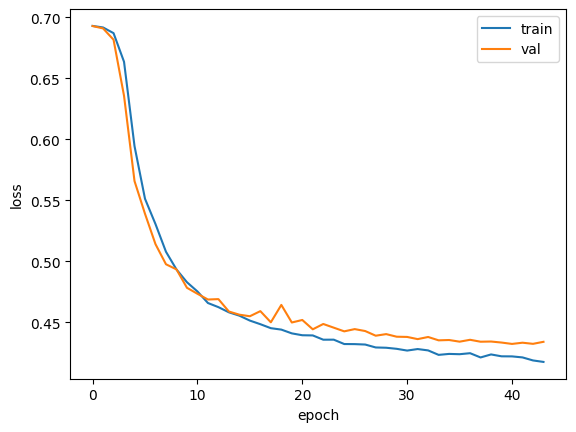

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**GRU 신경망 훈련하기**

In [14]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100)) #단어 임베딩
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


GRU 층의 모델 파라미터 개수를 계산 <br>
GRU에는 3개의 작은 셀이 존재한다. 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다. <br>
입력에 곱하는 가중치는 16 * 8 = 128개이고, 은닉 상태에 곱하는 가중치는 8 * 8 = 64개이다. 그리고 절편은 8개이다. 128 + 64 + 8 = 200개이다. 이 셀이 총 3개 있기 때문에, 600개의 모델 파라미터가 필요하다. <br>
*노션 설명 참고*


In [16]:
#모델 컴파일 및 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 46ms/step - loss: 0.6927 - accuracy: 0.5211 - val_loss: 0.6919 - val_accuracy: 0.5512
Epoch 2/100
  5/313 [..............................] - ETA: 11s - loss: 0.6927 - accuracy: 0.5094

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 42ms/step - loss: 0.6910 - accuracy: 0.5604 - val_loss: 0.6902 - val_accuracy: 0.5678
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6888 - accuracy: 0.5744 - val_loss: 0.6878 - val_accuracy: 0.5738
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6855 - accuracy: 0.5907 - val_loss: 0.6840 - val_accuracy: 0.5884
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6806 - accuracy: 0.5992 - val_loss: 0.6790 - val_accuracy: 0.5982
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6738 - accuracy: 0.6158 - val_loss: 0.6714 - val_accuracy: 0.6086
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6640 - accuracy: 0.6269 - val_loss: 0.6610 - val_accuracy: 0.6192
Epoch 8/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6504 - accuracy: 0.6385 - val_loss: 0.6469 - val_accuracy: 0.63

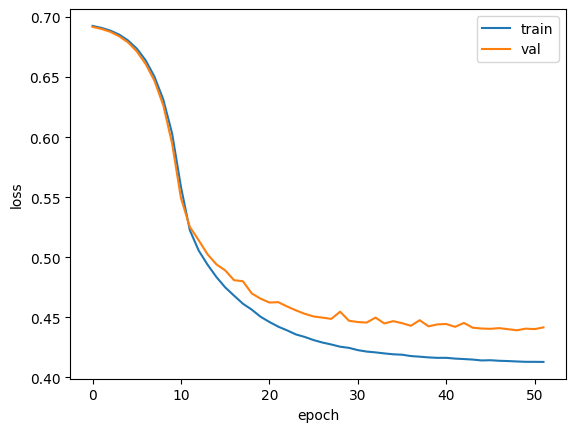

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()